In [8]:
# first neural network with keras tutorial
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from numpy import unique
from numpy import argmax
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import plot_model


In [12]:
# load the dataset
dataset = loadtxt('Data/Datas.csv', delimiter=',') 

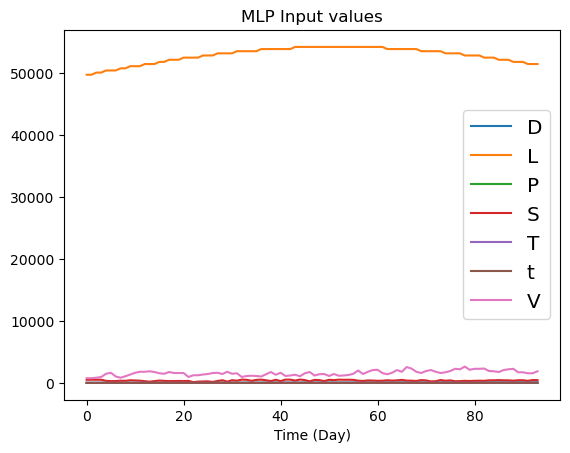

In [14]:
#Plot the input 
X = dataset[:,0:7]
y = dataset[:,7]
plt.plot(X)
plt.xlabel('Time (Day)')
#plt.ylabel('Crop Yield')
plt.title('MLP Input values')
plt.legend("DLPSTtV", fontsize="x-large")
plt.show()

In [16]:
# #ESSAI 3  -----OK
X = dataset[:,0:7]
y = dataset[:,7]
scalarX, scalarY = MinMaxScaler(feature_range=(0,1)), MinMaxScaler(feature_range=(0,0.78272))
scalarX.fit(X)
scalarY.fit(y.reshape(94,1)) 
X = scalarX.transform(X)
y=np.array(y).reshape(94,1) 
y = scalarY.transform(y) 

In [18]:
#print(y)

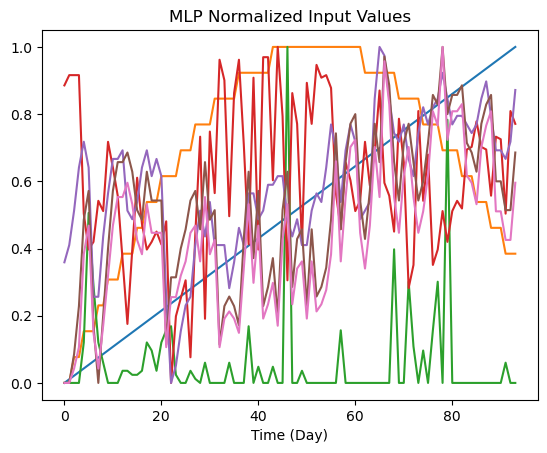

In [20]:
#Plot the Normalized input
plt.plot(X)
plt.xlabel('Time (Day)')
#plt.ylabel('Crop Yield')
plt.title('MLP Normalized Input Values')
#plt.legend("DLPSTtV", fontsize="x-large")
#plt.legend(loc="upper left")
plt.show()

In [22]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu')) #kernel_initializer='normal'
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #linear
print(model.summary())

H:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
#Model optimization: SGD and Adam
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.0, momentum=0.7, nesterov=False)
adam=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(optimizer=sgd, loss='mean_absolute_error')

H:\Anaconda\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [26]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=100, batch_size=4, verbose=2, validation_split=0.20)

Epoch 1/100
19/19 - 0s - 21ms/step - loss: 0.0869 - val_loss: 0.6607
Epoch 2/100
19/19 - 0s - 2ms/step - loss: 0.0832 - val_loss: 0.6378
Epoch 3/100
19/19 - 0s - 2ms/step - loss: 0.0812 - val_loss: 0.6612
Epoch 4/100
19/19 - 0s - 2ms/step - loss: 0.0825 - val_loss: 0.6583
Epoch 5/100
19/19 - 0s - 2ms/step - loss: 0.0802 - val_loss: 0.6564
Epoch 6/100
19/19 - 0s - 2ms/step - loss: 0.0792 - val_loss: 0.6526
Epoch 7/100
19/19 - 0s - 2ms/step - loss: 0.0801 - val_loss: 0.6340
Epoch 8/100
19/19 - 0s - 2ms/step - loss: 0.0803 - val_loss: 0.6461
Epoch 9/100
19/19 - 0s - 2ms/step - loss: 0.0788 - val_loss: 0.6614
Epoch 10/100
19/19 - 0s - 2ms/step - loss: 0.0757 - val_loss: 0.5887
Epoch 11/100
19/19 - 0s - 2ms/step - loss: 0.0803 - val_loss: 0.6099
Epoch 12/100
19/19 - 0s - 2ms/step - loss: 0.0748 - val_loss: 0.6328
Epoch 13/100
19/19 - 0s - 2ms/step - loss: 0.0773 - val_loss: 0.6254
Epoch 14/100
19/19 - 0s - 2ms/step - loss: 0.0756 - val_loss: 0.6123
Epoch 15/100
19/19 - 0s - 2ms/step - loss:

In [27]:
# evaluate on test set
yhat = model.predict(X)
error = mean_absolute_error(y, yhat)
print('MAE: %.5f' % error)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE: 0.02008


In [30]:
# Print the optimized output
print(yhat) 

[[-1.11396117e-02]
 [-1.11093717e-02]
 [-1.51323555e-02]
 [-1.72573328e-02]
 [-1.41054327e-02]
 [-8.99567921e-03]
 [-8.51512607e-03]
 [-1.08254859e-02]
 [-1.15159499e-02]
 [-1.99161321e-02]
 [-1.67961828e-02]
 [-1.36569599e-02]
 [-1.46750668e-02]
 [-8.58695246e-03]
 [-1.17522562e-02]
 [-1.84617117e-02]
 [-1.39588723e-02]
 [-1.73861794e-02]
 [-1.55560402e-02]
 [-1.36332558e-02]
 [-1.76540539e-02]
 [-1.57579556e-02]
 [-7.24771339e-03]
 [-9.06979758e-03]
 [-1.42262997e-02]
 [-1.31365145e-02]
 [-8.12972616e-03]
 [-1.72025636e-02]
 [-1.91317275e-02]
 [-9.86721646e-03]
 [-1.53977601e-02]
 [-1.66625418e-02]
 [-2.00560689e-02]
 [-1.74076408e-02]
 [-8.97183362e-03]
 [-1.27481585e-02]
 [-1.82625465e-02]
 [-1.29628489e-02]
 [-6.79512043e-03]
 [-1.18311616e-02]
 [-8.57102685e-04]
 [-1.55781209e-03]
 [ 3.05404793e-03]
 [ 5.35357650e-03]
 [ 3.18841636e-03]
 [ 1.89476553e-03]
 [ 1.32568190e-02]
 [ 1.69496723e-02]
 [ 2.05585621e-02]
 [ 4.43564951e-02]
 [ 3.46327163e-02]
 [ 4.09592725e-02]
 [ 5.8599777

In [32]:
#print(y) 

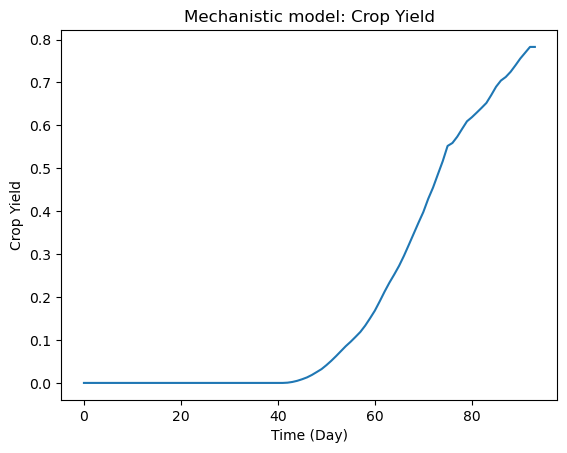

In [34]:
plt.plot(y)
plt.xlabel('Time (Day)')
plt.ylabel('Crop Yield')
plt.title('Mechanistic model: Crop Yield')
plt.show()

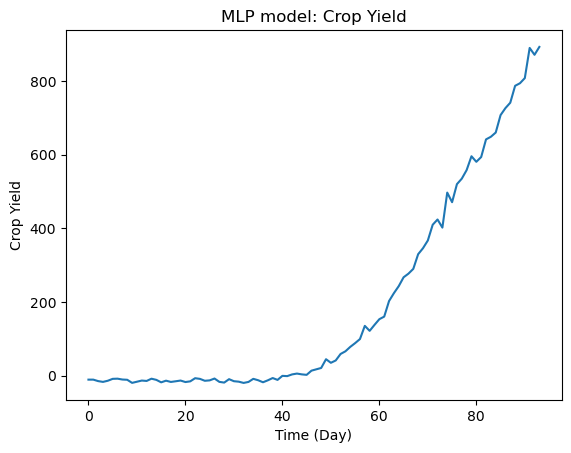

In [36]:
# plot the optimized output
plt.plot(yhat*1000)
plt.xlabel('Time (Day)')
plt.ylabel('Crop Yield')
plt.title('MLP model: Crop Yield')
plt.show()